In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
%matplotlib inline

## Tarea 3:

Integrantes:

Sebastian Neely   
Eugenio Paz  
Vittorio Pesenti  
Nicolas Nieto  
Adolfo Godoy  
Nicolas Emeterio Guzman  
Cristobal Varas

## Día de más movilidad en cuarentena en la RM?

In [8]:
#Probamos el formato del df para los separadores " ; "
df_error = pd.read_csv("C:/Users/etp_0/Data_Analisis/applemobilitytrends-2021-12-07.csv", sep=';', low_memory = False)
df_error.head() #Claramente no es " ; "

geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,2020-08-16,2020-08-17,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-22,2020-08-23,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-29,2020-08-30,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30,2020-10-01,2020-10-02,2020-10-03,2020-10-04,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-14,2020-11-15,2020-11-16,2020-11-17,2020-11-18,2020-11-19,2020-11-20,2020-11-21,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29,2020-11-30,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09,2020-12-10,2020-12-11,2020-12-12,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03,2

In [11]:
# Dataframe con separador "," 
df = pd.read_csv("C:/Users/etp_0/Data_Analisis/applemobilitytrends-2021-12-07.csv", sep=',', low_memory = False)
df.head() #ahora esta correcto el formato

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-11-28,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,180.37,166.94,152.35,151.20,141.39,163.52,172.67,162.12,156.23,150.23
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,159.66,164.26,181.32,224.26,210.36,215.39,214.93,156.72,191.94,208.66
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,77.77,86.90,93.26,100.08,104.56,135.03,146.15,91.97,97.89,128.10
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,55.37,89.50,94.21,99.95,103.63,125.52,123.87,71.43,102.94,122.42
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,116.27,120.49,128.27,130.51,135.67,143.79,113.66,121.15,124.25,128.52


In [12]:
# Filtros para seleccionar solo RM , se selecciona las partes del df donde region = Santiago
df2 = df[df['region'] == 'Santiago']
df2.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-11-28,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07
791,city,Santiago,driving,Santiago de Chile,Santiago Metropolitan Region,Chile,100.0,101.96,105.49,107.92,...,77.73,101.78,109.77,116.10,115.88,154.11,134.38,84.19,115.82,140.95
792,city,Santiago,walking,Santiago de Chile,Santiago Metropolitan Region,Chile,100.0,104.69,106.20,105.99,...,57.31,97.68,106.98,115.78,111.88,137.30,109.89,62.87,115.53,132.06


## Se optará por mantener las filas 791 y 792, por redundancia en los datos

In [13]:
# df2.drop(df.index[[2,3]], inplace = True)
df2.drop(['geo_type', 'region', 'alternative_name', 'country', 'sub-region'], axis = 1, inplace = True)
#El error indica que se esta extrayendo una copia de parte del df, no genernado un df nuevo

C:\Users\etp_0\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
#Procedemos a filtrar y ordenar por el tipo de transporte utilizado
pivote = df2.melt(id_vars=['transportation_type'], var_name="fecha", value_name="indice") 

In [17]:
pivote

,transportation_type,fecha,indice
0,driving,2020-01-13,100.00
1,walking,2020-01-13,100.00
2,driving,2020-01-14,101.96
3,walking,2020-01-14,104.69
4,driving,2020-01-15,105.49
...,...,...,...
1385,walking,2021-12-05,62.87
1386,driving,2021-12-06,115.82
1387,walking,2021-12-06,115.53
1388,driving,2021-12-07,140.95


In [19]:
#Comprobamos que todos los datos esten con tipo correcto
pivote.info()
#Notar que fecha esta en formato object por l o que debe cambiar a date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transportation_type  1390 non-null   object 
 1   fecha                1390 non-null   object 
 2   indice               1384 non-null   float64
dtypes: float64(1), object(2)
memory usage: 32.7+ KB


In [21]:
#Realizamos el cambio en formato
pivote['fecha'] = pd.to_datetime(pivote['fecha'])

In [22]:
#Comprobamos que se haya realizado
pivote.info()
#Esta bien

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   transportation_type  1390 non-null   object        
 1   fecha                1390 non-null   datetime64[ns]
 2   indice               1384 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 32.7+ KB


In [23]:
#generamos un df con los que manejan y otro con los que caminan, para compararlos posteriormente
Maneja = pivote[pivote['transportation_type'] == 'driving']

In [31]:
Camina = pivote[pivote['transportation_type'] == 'walking']

In [32]:
Camina

,transportation_type,fecha,indice
1,walking,2020-01-13,100.00
3,walking,2020-01-14,104.69
5,walking,2020-01-15,106.20
7,walking,2020-01-16,105.99
9,walking,2020-01-17,105.57
...,...,...,...
1381,walking,2021-12-03,137.30
1383,walking,2021-12-04,109.89
1385,walking,2021-12-05,62.87
1387,walking,2021-12-06,115.53


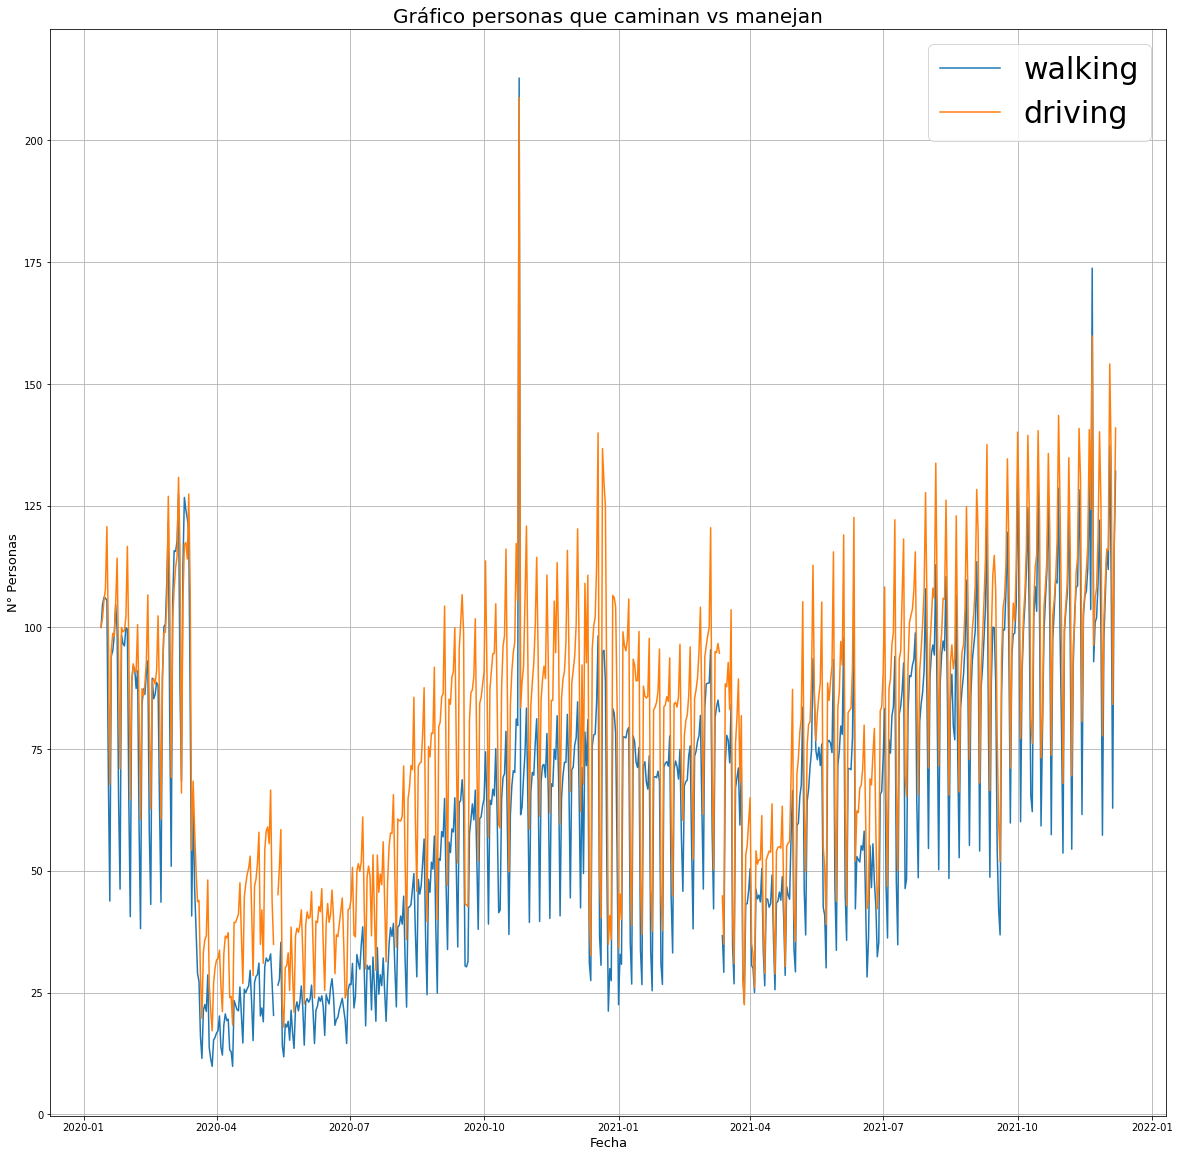

In [33]:
x=Camina["fecha"]
y1 = Camina["indice"]
y2 = Maneja["indice"]
plt.figure(figsize=(20,20))
plt.plot(x,y1, label='walking')
plt.plot(x,y2, label = 'driving')


plt.xlabel("Fecha",fontsize=13)
plt.ylabel("N° Personas",fontsize=13)
plt.legend(fontsize=30)

plt.title('Gráfico personas que caminan vs manejan',fontsize=20)
plt.grid()
plt.show()

## Se observa que hubieron mas personas manejando que caminando

## --
- A continuación se trabajará con el df de Google y df PlanPasoaPaso para responder la segunda pregunta ¿Los parques se visitaban mas en la RM?

In [34]:
# Definir lo que es una cuarentena: Es completa para la region?
# Nuestro grupo definió como cuarentena, cuando todas las comunas estén en fase 1

In [36]:
#df de Google
google = pd.read_csv("https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv", sep=',', low_memory = False)

In [37]:
google = google[google['sub_region_1'] == 'Santiago Metropolitan Region']

In [38]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4620 entries, 2230506 to 2235125
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_region_code                                 4620 non-null   object 
 1   country_region                                      4620 non-null   object 
 2   sub_region_1                                        4620 non-null   object 
 3   sub_region_2                                        3960 non-null   object 
 4   metro_area                                          0 non-null      object 
 5   iso_3166_2_code                                     660 non-null    object 
 6   census_fips_code                                    0 non-null      float64
 7   place_id                                            4620 non-null   object 
 8   date                                                4620 non-null   o

In [39]:
#Ordeno por fechas de menor a mayor
google.sort_values(by='date', ascending=True)  
google

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2230506,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-15,-10.0,-7.0,-9.0,-7.0,-4.0,0.0
2230507,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-16,-6.0,-3.0,-12.0,-2.0,0.0,-1.0
2230508,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-17,-8.0,-3.0,-10.0,-8.0,-9.0,1.0
2230509,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-18,-9.0,-4.0,-10.0,-8.0,-8.0,1.0
2230510,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-19,-8.0,-4.0,-10.0,-8.0,-8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235121,CL,Chile,Santiago Metropolitan Region,Talagante Province,NaN,NaN,NaN,ChIJv825d6jjYpYREU_tQqXBG8M,2021-12-01,30.0,41.0,5.0,-5.0,22.0,8.0
2235122,CL,Chile,Santiago Metropolitan Region,Talagante Province,NaN,NaN,NaN,ChIJv825d6jjYpYREU_tQqXBG8M,2021-12-02,31.0,38.0,14.0,-4.0,20.0,8.0
2235123,CL,Chile,Santiago Metropolitan Region,Talagante Province,NaN,NaN,NaN,ChIJv825d6jjYpYREU_tQqXBG8M,2021-12-03,35.0,42.0,12.0,28.0,20.0,9.0
2235124,CL,Chile,Santiago Metropolitan Region,Talagante Province,NaN,NaN,NaN,ChIJv825d6jjYpYREU_tQqXBG8M,2021-12-04,13.0,28.0,8.0,-6.0,16.0,6.0


In [40]:
#Dejamos algunas columnas
Google = pd.DataFrame(google)[['sub_region_1','date','retail_and_recreation_percent_change_from_baseline',
                               'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline',
                               'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
                               'residential_percent_change_from_baseline']]
Google

,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2230506,Santiago Metropolitan Region,2020-02-15,-10.0,-7.0,-9.0,-7.0,-4.0,0.0
2230507,Santiago Metropolitan Region,2020-02-16,-6.0,-3.0,-12.0,-2.0,0.0,-1.0
2230508,Santiago Metropolitan Region,2020-02-17,-8.0,-3.0,-10.0,-8.0,-9.0,1.0
2230509,Santiago Metropolitan Region,2020-02-18,-9.0,-4.0,-10.0,-8.0,-8.0,1.0
2230510,Santiago Metropolitan Region,2020-02-19,-8.0,-4.0,-10.0,-8.0,-8.0,1.0
...,...,...,...,...,...,...,...,...
2235121,Santiago Metropolitan Region,2021-12-01,30.0,41.0,5.0,-5.0,22.0,8.0
2235122,Santiago Metropolitan Region,2021-12-02,31.0,38.0,14.0,-4.0,20.0,8.0
2235123,Santiago Metropolitan Region,2021-12-03,35.0,42.0,12.0,28.0,20.0,9.0
2235124,Santiago Metropolitan Region,2021-12-04,13.0,28.0,8.0,-6.0,16.0,6.0


In [41]:
#Renombramos columnas
Google = Google.rename(columns={'sub_region_1':'Nombre_Region',
                                'date':'fecha',
                         'retail_and_recreation_percent_change_from_baseline':'I_recreation',
                         'grocery_and_pharmacy_percent_change_from_baseline':'I_grocery_pharmacy',
                         'parks_percent_change_from_baseline':'I_parks',
                         'transit_stations_percent_change_from_baseline':'I_transit_stations',
                         'workplaces_percent_change_from_baseline':'I_workplaces',
                         'residential_percent_change_from_baseline':'I_residential',})

In [45]:
Google

,Nombre_Region,fecha,I_recreation,I_grocery_pharmacy,I_parks,I_transit_stations,I_workplaces,I_residential
2224492,Santiago Metropolitan Region,2020-02-15,-10.0,-7.0,-9.0,-7.0,-4.0,0.0
2227782,Santiago Metropolitan Region,2020-02-15,-11.0,-6.0,-11.0,-7.0,-4.0,0.0
2226466,Santiago Metropolitan Region,2020-02-15,-1.0,-3.0,-3.0,-2.0,-4.0,-1.0
2225150,Santiago Metropolitan Region,2020-02-15,-8.0,-7.0,-8.0,10.0,-2.0,0.0
2228440,Santiago Metropolitan Region,2020-02-15,-4.0,1.0,2.0,-9.0,-3.0,0.0
...,...,...,...,...,...,...,...,...
2226465,Santiago Metropolitan Region,2021-12-03,12.0,24.0,-11.0,41.0,14.0,9.0
2227781,Santiago Metropolitan Region,2021-12-03,20.0,35.0,-8.0,136.0,29.0,7.0
2225807,Santiago Metropolitan Region,2021-12-03,56.0,50.0,54.0,46.0,26.0,7.0
2227123,Santiago Metropolitan Region,2021-12-03,27.0,33.0,36.0,12.0,22.0,8.0


In [42]:
#Ordenamos por fechas de menor a mayor
Google2=Google.sort_values(by='fecha', ascending=True)  
Google2

,Nombre_Region,fecha,I_recreation,I_grocery_pharmacy,I_parks,I_transit_stations,I_workplaces,I_residential
2230506,Santiago Metropolitan Region,2020-02-15,-10.0,-7.0,-9.0,-7.0,-4.0,0.0
2231166,Santiago Metropolitan Region,2020-02-15,-8.0,-7.0,-8.0,10.0,-2.0,0.0
2234466,Santiago Metropolitan Region,2020-02-15,-4.0,1.0,2.0,-9.0,-3.0,0.0
2232486,Santiago Metropolitan Region,2020-02-15,-1.0,-3.0,-3.0,-2.0,-4.0,-1.0
2231826,Santiago Metropolitan Region,2020-02-15,-5.0,-5.0,-2.0,-10.0,-4.0,0.0
...,...,...,...,...,...,...,...,...
2232485,Santiago Metropolitan Region,2021-12-05,10.0,10.0,-15.0,38.0,8.0,6.0
2233805,Santiago Metropolitan Region,2021-12-05,6.0,35.0,-18.0,99.0,22.0,8.0
2231825,Santiago Metropolitan Region,2021-12-05,62.0,44.0,60.0,NaN,22.0,6.0
2233145,Santiago Metropolitan Region,2021-12-05,22.0,33.0,28.0,6.0,15.0,6.0


In [43]:
#Leemos df Plan paso a paso
PlanPasoP=pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/input/Paso_a_paso/paso_a_paso.csv?raw=true', sep=',')

In [44]:
#Pasamos las fechas desde columnas a filas
PlanPasoP2=PlanPasoP.melt(id_vars=["codigo_region","region_residencia","codigo_comuna",
                                   "comuna_residencia","zona"], var_name="fecha", value_name="paso")
PlanPasoP2

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,fecha,paso
0,15,Arica y Parinacota,15101,Arica,Rural,2020-07-28,3
1,15,Arica y Parinacota,15101,Arica,Urbana,2020-07-28,1
2,15,Arica y Parinacota,15102,Camarones,Total,2020-07-28,3
3,15,Arica y Parinacota,15202,General Lagos,Total,2020-07-28,3
4,15,Arica y Parinacota,15201,Putre,Total,2020-07-28,3
...,...,...,...,...,...,...,...
193607,12,Magallanes,12101,Punta Arenas,Total,2021-12-08,4
193608,12,Magallanes,12103,Río Verde,Total,2021-12-08,4
193609,12,Magallanes,12104,San Gregorio,Total,2021-12-08,4
193610,12,Magallanes,12303,Timaukel,Total,2021-12-08,4


In [45]:
#Renombramos columnas:
PlanPasoP2 = PlanPasoP2.rename(columns={'region_residencia':'Nombre_Region',
                                        'comuna_residencia':'Nombre_Comuna',
                                        'codigo_comuna':'Codigo_Comuna'})
PlanPasoP2

,codigo_region,Nombre_Region,Codigo_Comuna,Nombre_Comuna,zona,fecha,paso
0,15,Arica y Parinacota,15101,Arica,Rural,2020-07-28,3
1,15,Arica y Parinacota,15101,Arica,Urbana,2020-07-28,1
2,15,Arica y Parinacota,15102,Camarones,Total,2020-07-28,3
3,15,Arica y Parinacota,15202,General Lagos,Total,2020-07-28,3
4,15,Arica y Parinacota,15201,Putre,Total,2020-07-28,3
...,...,...,...,...,...,...,...
193607,12,Magallanes,12101,Punta Arenas,Total,2021-12-08,4
193608,12,Magallanes,12103,Río Verde,Total,2021-12-08,4
193609,12,Magallanes,12104,San Gregorio,Total,2021-12-08,4
193610,12,Magallanes,12303,Timaukel,Total,2021-12-08,4


In [46]:
#Eliminamos columnas que no necesitaremos
PlanPasoP3 = PlanPasoP2.drop(['codigo_region','Codigo_Comuna','Nombre_Comuna','zona'], axis=1)
PlanPasoP3

,Nombre_Region,fecha,paso
0,Arica y Parinacota,2020-07-28,3
1,Arica y Parinacota,2020-07-28,1
2,Arica y Parinacota,2020-07-28,3
3,Arica y Parinacota,2020-07-28,3
4,Arica y Parinacota,2020-07-28,3
...,...,...,...
193607,Magallanes,2021-12-08,4
193608,Magallanes,2021-12-08,4
193609,Magallanes,2021-12-08,4
193610,Magallanes,2021-12-08,4


In [47]:
#Dejamos filas que tengan solo a la región metropolitana
PlanPasoP4 = PlanPasoP3[PlanPasoP3['Nombre_Region'] == 'Metropolitana']
PlanPasoP4

,Nombre_Region,fecha,paso
87,Metropolitana,2020-07-28,3
88,Metropolitana,2020-07-28,1
89,Metropolitana,2020-07-28,1
90,Metropolitana,2020-07-28,1
91,Metropolitana,2020-07-28,1
...,...,...,...
193361,Metropolitana,2021-12-08,4
193362,Metropolitana,2021-12-08,4
193363,Metropolitana,2021-12-08,4
193364,Metropolitana,2021-12-08,4


In [48]:
#Dejamos filas que tengan solo plan paso a paso = 1 (cuarentena, definido por nosotros)
PlanPasoP5 = PlanPasoP4[PlanPasoP4['paso'] == 1]
PlanPasoP5

,Nombre_Region,fecha,paso
88,Metropolitana,2020-07-28,1
89,Metropolitana,2020-07-28,1
90,Metropolitana,2020-07-28,1
91,Metropolitana,2020-07-28,1
93,Metropolitana,2020-07-28,1
...,...,...,...
133198,Metropolitana,2021-07-06,1
133560,Metropolitana,2021-07-07,1
133566,Metropolitana,2021-07-07,1
133567,Metropolitana,2021-07-07,1


In [50]:
#Eliminamos duplicados, para tener fechas unicas registradas
PlanPasoP6 = PlanPasoP5.drop_duplicates(['fecha'])
PlanPasoP6

,Nombre_Region,fecha,paso
88,Metropolitana,2020-07-28,1
476,Metropolitana,2020-07-29,1
864,Metropolitana,2020-07-30,1
1252,Metropolitana,2020-07-31,1
1640,Metropolitana,2020-08-01,1
...,...,...,...
132008,Metropolitana,2021-07-03,1
132396,Metropolitana,2021-07-04,1
132784,Metropolitana,2021-07-05,1
133172,Metropolitana,2021-07-06,1


In [52]:
#Ordeno por fechas de menor a mayor
PlanPasoP7 = PlanPasoP6.sort_values(by='fecha', ascending=True)  
PlanPasoP7

,Nombre_Region,fecha,paso
88,Metropolitana,2020-07-28,1
476,Metropolitana,2020-07-29,1
864,Metropolitana,2020-07-30,1
1252,Metropolitana,2020-07-31,1
1640,Metropolitana,2020-08-01,1
...,...,...,...
132008,Metropolitana,2021-07-03,1
132396,Metropolitana,2021-07-04,1
132784,Metropolitana,2021-07-05,1
133172,Metropolitana,2021-07-06,1


In [53]:
#Unimos ambos data set por las fechas
#El dataset de Google comienza en febrero, mientras que el de plan paso a paso lo hace desde julio.
#por lo que habra muchos Null, sin embargo para efectos graficos,
#podemos inferir igualdad de condiciones en los períodos
Union = Google2.merge(PlanPasoP7, on='fecha')
Union

,Nombre_Region_x,fecha,I_recreation,I_grocery_pharmacy,I_parks,I_transit_stations,I_workplaces,I_residential,Nombre_Region_y,paso
0,Santiago Metropolitan Region,2020-07-28,-65.0,-37.0,-57.0,-64.0,-57.0,30.0,Metropolitana,1
1,Santiago Metropolitan Region,2020-07-28,-18.0,-24.0,1.0,-23.0,-41.0,26.0,Metropolitana,1
2,Santiago Metropolitan Region,2020-07-28,-43.0,-35.0,-39.0,-49.0,-42.0,25.0,Metropolitana,1
3,Santiago Metropolitan Region,2020-07-28,-53.0,-36.0,-35.0,-56.0,-52.0,28.0,Metropolitana,1
4,Santiago Metropolitan Region,2020-07-28,-49.0,-23.0,-68.0,-15.0,-36.0,23.0,Metropolitana,1
...,...,...,...,...,...,...,...,...,...,...
1360,Santiago Metropolitan Region,2021-07-07,1.0,11.0,5.0,5.0,-4.0,14.0,Metropolitana,1
1361,Santiago Metropolitan Region,2021-07-07,2.0,15.0,-21.0,-19.0,-4.0,15.0,Metropolitana,1
1362,Santiago Metropolitan Region,2021-07-07,-15.0,12.0,-20.0,-17.0,-19.0,17.0,Metropolitana,1
1363,Santiago Metropolitan Region,2021-07-07,-9.0,2.0,-8.0,11.0,-17.0,16.0,Metropolitana,1


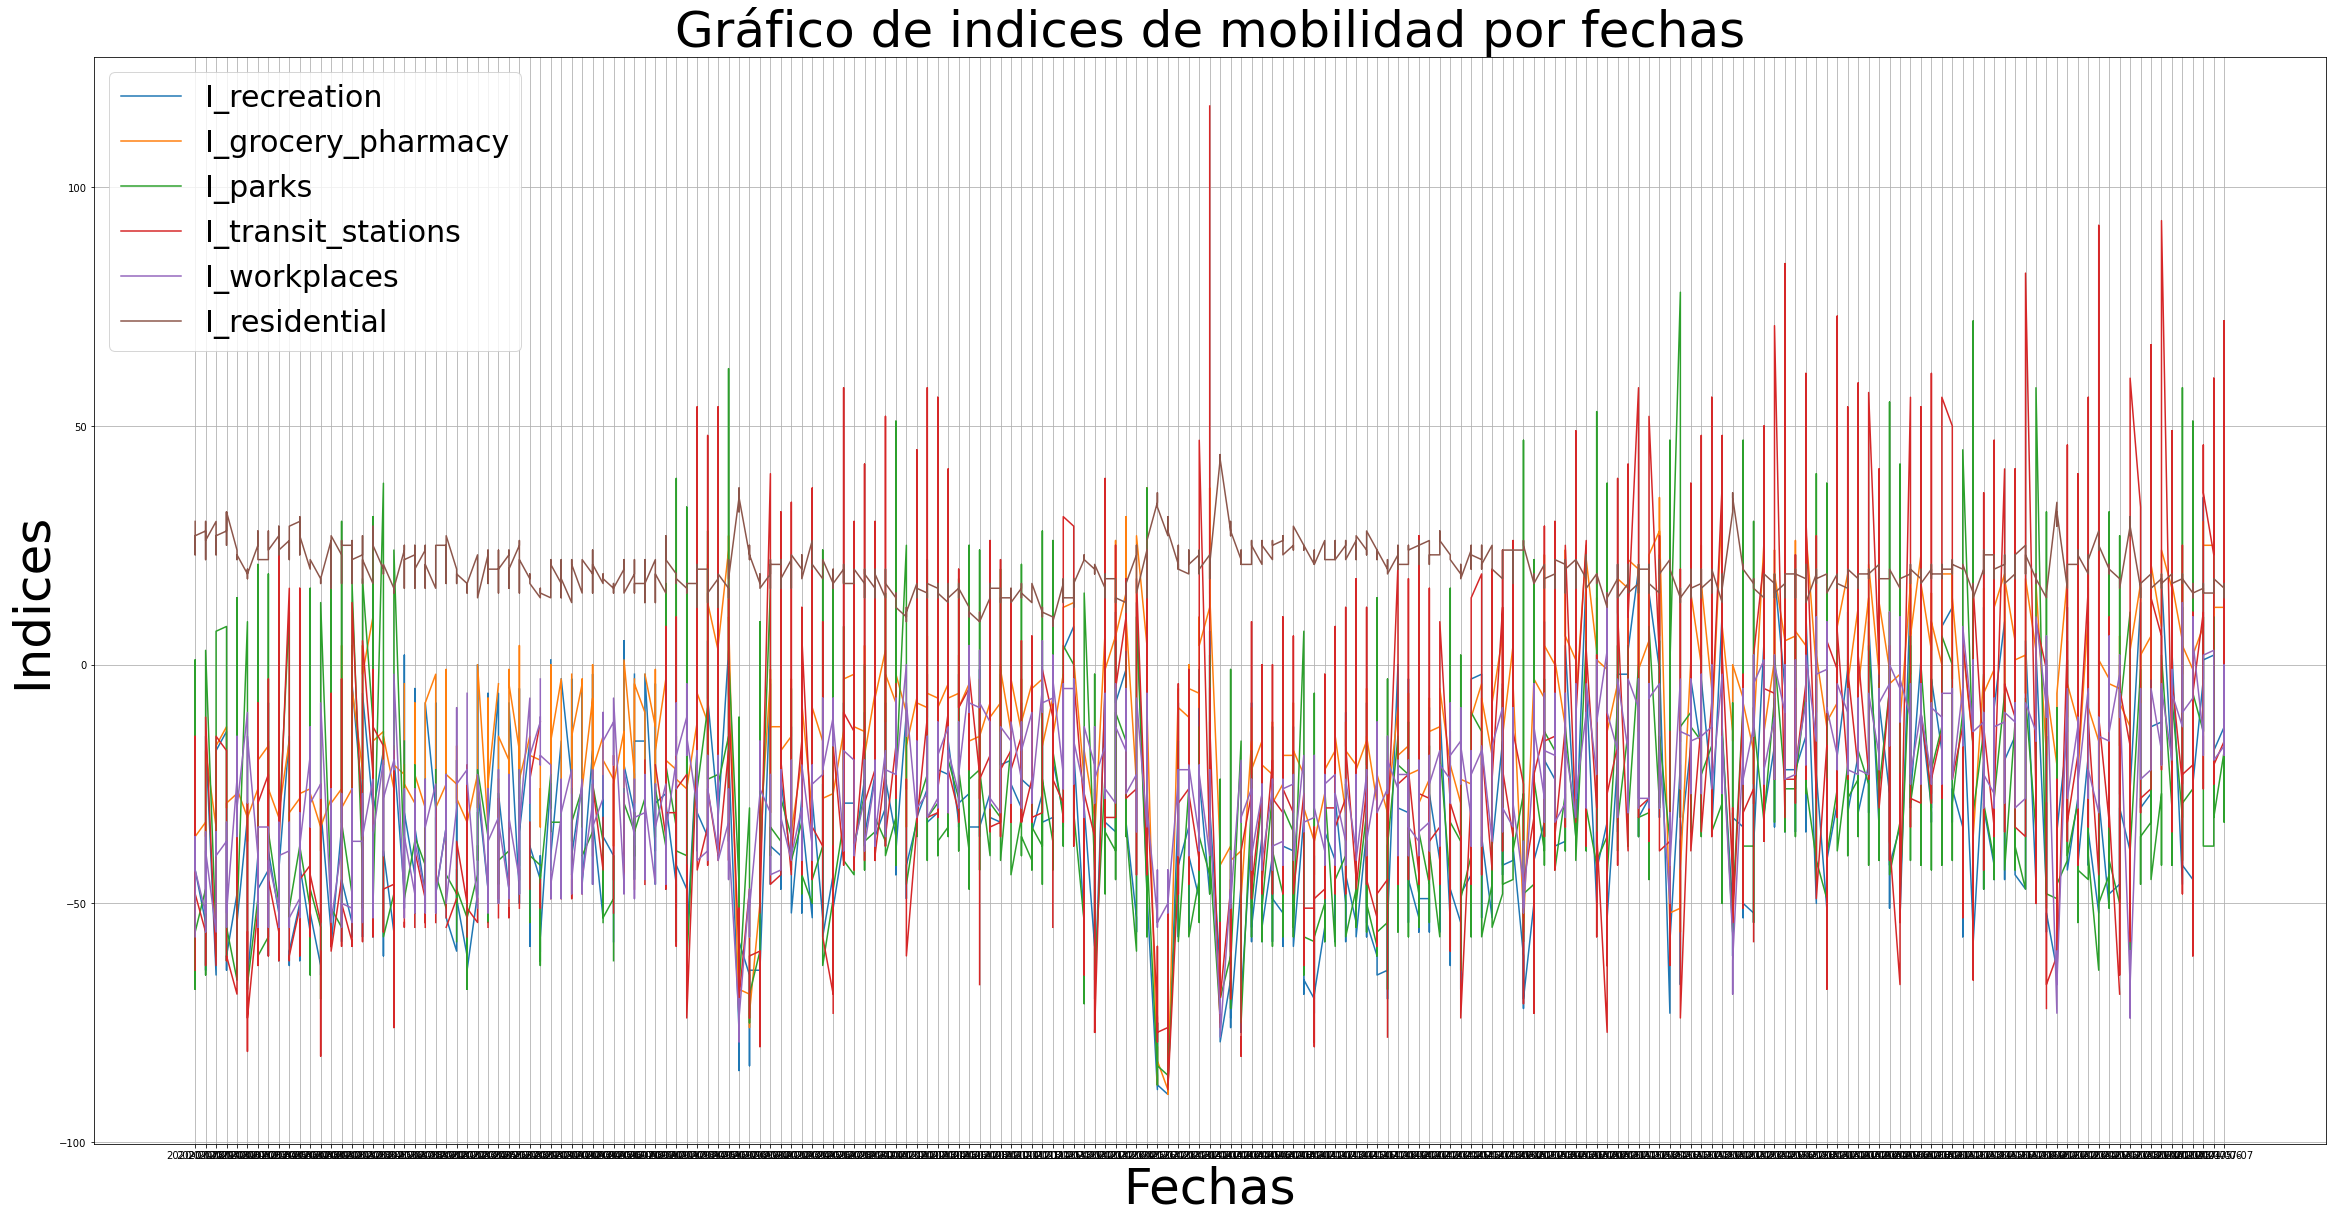

In [57]:
#Graficamos

x=Union["fecha"]
y1 = Union["I_recreation"]
y2 = Union["I_grocery_pharmacy"]
y3 = Union["I_parks"]
y4 = Union["I_transit_stations"]
y5 = Union["I_workplaces"]
y6 = Union["I_residential"]

plt.figure(figsize=(40,20))
plt.plot(x,y1, label = 'I_recreation')
plt.plot(x,y2, label = 'I_grocery_pharmacy')
plt.plot(x,y3, label = 'I_parks')
plt.plot(x,y4, label = 'I_transit_stations')
plt.plot(x,y5, label = 'I_workplaces')
plt.plot(x,y6, label = 'I_residential')


plt.xlabel("Fechas",fontsize=50)
plt.ylabel("Indices",fontsize=50)
plt.legend(fontsize=30)

plt.title('Gráfico de indices de mobilidad por fechas',fontsize=50)
plt.grid()
plt.show()